In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling

In [59]:
def concat_two_df_and_drop_same_column_in_df2(DF1, DF2):
    display(DF1.head(1))
    display(DF2.head(1))
    DF2.drop(DF2.columns[DF2.columns.isin(DF1.columns)],axis=1,inplace=True)
#     DF1.drop(DF1.columns[DF1.columns.isin(DF2.columns)],axis=1,inplace=True)
    result = pd.concat([DF1, DF2], axis=1)
    display(result.head(1))
    return result

In [144]:
def plot_feature(dataframe, feature, qty_ratio=1, fdi_top = True):
    plt.figure(dpi=150, figsize=(15,4))
    rng = int(dataframe[ dataframe['FDI']==True ][feature].count()*qty_ratio)
    print(rng)
    x = np.arange(0,rng)
    if fdi_top:
        plt.scatter(x, dataframe[ dataframe['FDI']==False ][feature].to_numpy()[:rng], s=1, c='b', alpha=0.1)
        plt.scatter(x, dataframe[ dataframe['FDI']==True ][feature].to_numpy()[:rng], s=1, c='r', alpha=0.1)
    else:
        plt.scatter(x, dataframe[ dataframe['FDI']==True ][feature].to_numpy()[:rng], s=1, c='r', alpha=0.1)
        plt.scatter(x, dataframe[ dataframe['FDI']==False ][feature].to_numpy()[:rng], s=1, c='b', alpha=0.1)

In [50]:
four_time = pd.read_csv("CSV/four_time.csv")
v_value = pd.read_csv("CSV/v_value.csv")
mic = pd.read_csv("CSV/mic.csv")
dwt_distance = pd.read_csv("CSV/sdtw_day_score_df.csv")
smart_meter = pd.read_csv("smart_meter.csv")

In [51]:
fdi = pd.read_csv("CSV/FDI.csv")

In [52]:
four_time.shape, v_value.shape, mic.shape, dwt_distance.shape, fdi.shape, smart_meter.shape

((2239250, 7),
 (2239250, 9),
 (2239250, 4),
 (2239250, 5),
 (2239250, 3),
 (107484000, 5))

In [60]:
result = concat_two_df_and_drop_same_column_in_df2(fdi, v_value)
result = concat_two_df_and_drop_same_column_in_df2(result, four_time)
result = concat_two_df_and_drop_same_column_in_df2(result, mic)
result = concat_two_df_and_drop_same_column_in_df2(result, dwt_distance)
result.columns

MeterID         Day  FDI
0     1236  2009-07-15  1.0

MeterID         Day   FDI  Tmax1  Tmax2  Tmin1     Cmax1     Cmax2  \
0     5212  2010-12-31  True     12     30     15  0.046464  0.047532   

      Cmin1  
0  0.013561

MeterID         Day  FDI  Tmax1  Tmax2  Tmin1     Cmax1     Cmax2     Cmin1
0     1236  2009-07-15  1.0     12     30     15  0.046464  0.047532  0.013561

MeterID         Day  FDI  Tmax1  Tmax2  Tmin1     Cmax1     Cmax2     Cmin1
0     1236  2009-07-15  1.0     12     30     15  0.046464  0.047532  0.013561

MeterID         Day   FDI  overnight  breakfast  daytime  evening
0     1236  2009-07-15  True   5.380015       15.5     24.5     38.0

MeterID         Day  FDI  Tmax1  Tmax2  Tmin1     Cmax1     Cmax2  \
0     1236  2009-07-15  1.0     12     30     15  0.046464  0.047532   

      Cmin1  overnight  breakfast  daytime  evening  
0  0.013561   5.380015       15.5     24.5     38.0

MeterID         Day  FDI  Tmax1  Tmax2  Tmin1     Cmax1     Cmax2  \
0     1236  2009-07-15  1.0     12     30     15  0.046464  0.047532   

      Cmin1  overnight  breakfast  daytime  evening  
0  0.013561   5.380015       15.5     24.5     38.0

MeterID         Day   FDI       mic
0     1236  2009-07-15  True  0.624128

MeterID         Day  FDI  Tmax1  Tmax2  Tmin1     Cmax1     Cmax2  \
0     1236  2009-07-15  1.0     12     30     15  0.046464  0.047532   

      Cmin1  overnight  breakfast  daytime  evening       mic  
0  0.013561   5.380015       15.5     24.5     38.0  0.624128

MeterID         Day  FDI  Tmax1  Tmax2  Tmin1     Cmax1     Cmax2  \
0     1236  2009-07-15  1.0     12     30     15  0.046464  0.047532   

      Cmin1  overnight  breakfast  daytime  evening       mic  
0  0.013561   5.380015       15.5     24.5     38.0  0.624128

MeterID         Day   FDI  meter_dtw  meter_sdtw
0     1236  2009-07-15  True   2.283294  -68.276715

MeterID         Day  FDI  Tmax1  Tmax2  Tmin1     Cmax1     Cmax2  \
0     1236  2009-07-15  1.0     12     30     15  0.046464  0.047532   

      Cmin1  overnight  breakfast  daytime  evening       mic  meter_dtw  \
0  0.013561   5.380015       15.5     24.5     38.0  0.624128   2.283294   

   meter_sdtw  
0  -68.276715

Index(['MeterID', 'Day', 'FDI', 'Tmax1', 'Tmax2', 'Tmin1', 'Cmax1', 'Cmax2',
       'Cmin1', 'overnight', 'breakfast', 'daytime', 'evening', 'mic',
       'meter_dtw', 'meter_sdtw'],
      dtype='object')

# start visualize

### mic

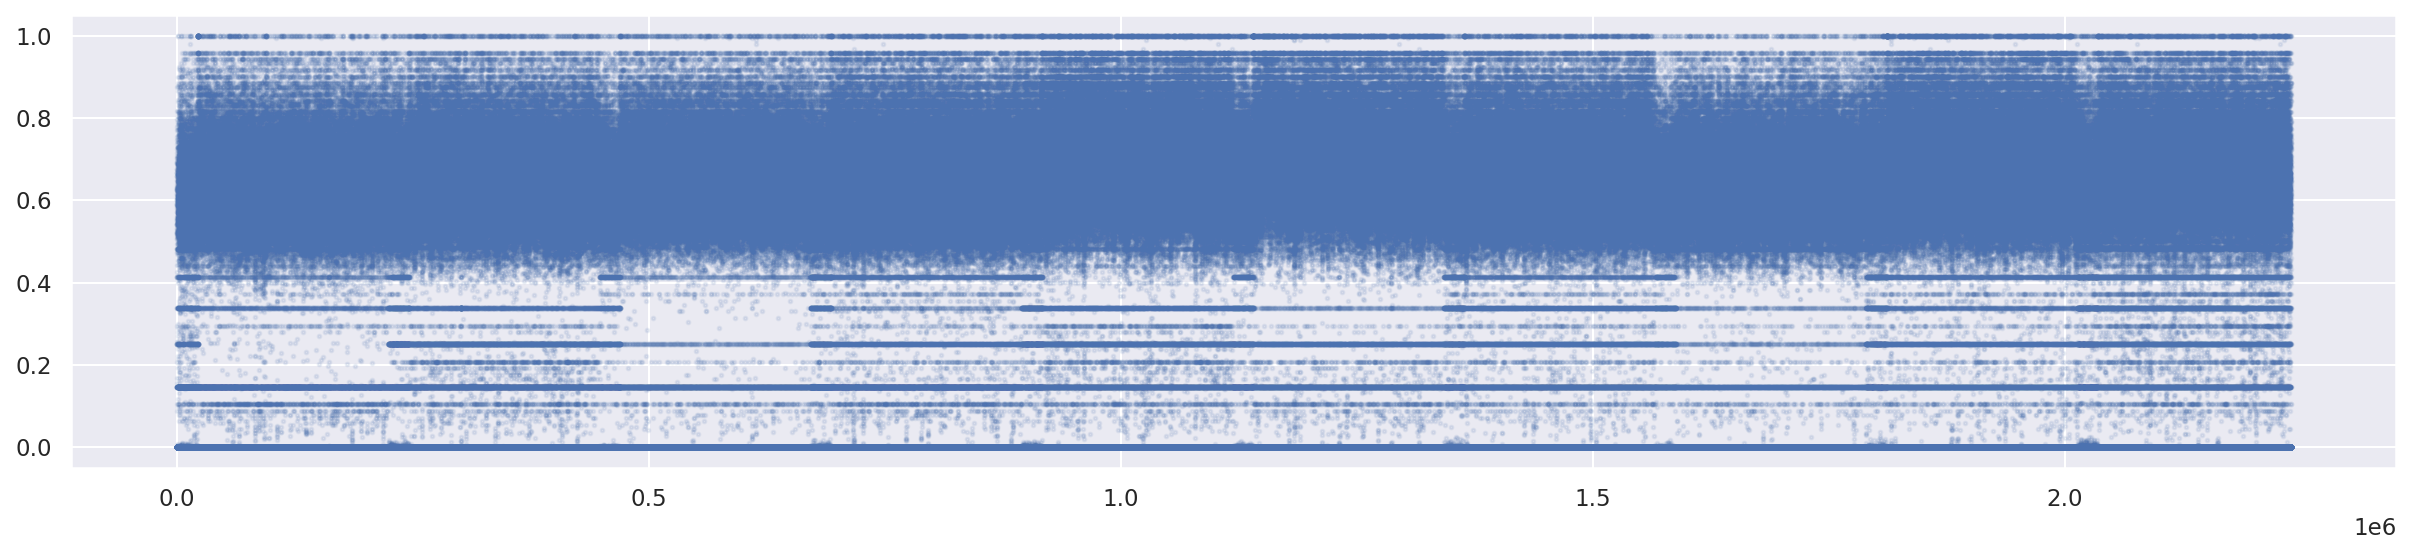

In [87]:
plt.figure(dpi=150, figsize=(20,4))
total_count = result['mic'].shape[0]
plt.scatter(np.arange(0, total_count), result['mic'],s=3, c='b', alpha=0.1)

In [91]:
result[ result['FDI']==0 ]

MeterID         Day  FDI  Tmax1  Tmax2  Tmin1     Cmax1     Cmax2  \
1           1236  2009-07-16  0.0     27     38     36  0.217125  0.231040   
4           1236  2009-07-19  0.0      0     39     19  0.082569  0.313303   
8           1236  2009-07-23  0.0      3     36     14  0.544495  0.124465   
12          1236  2009-07-27  0.0     20     36     22  0.093884  0.260092   
13          1236  2009-07-28  0.0      0     37     18  0.122018  0.245566   
...          ...         ...  ...    ...    ...    ...       ...       ...   
2239245     6954  2010-12-27  0.0     14     36     23  0.449008  0.149083   
2239246     6954  2010-12-28  0.0     17     39     31  0.476639  0.334087   
2239247     6954  2010-12-29  0.0     23     33     26  0.237754  0.352424   
2239248     6954  2010-12-30  0.0     17     33     25  0.161140  0.167671   
2239249     6954  2010-12-31  0.0     15     39     29  0.352298  0.222432   

            Cmin1  overnight  breakfast   daytime   evening       mic  \
1        0.021254   0.084015    0.23875  0.201571  0.196692  0.000000   
4        0.020948   0.029882    0.24775  0.295500  0.250308  0.000000   
8        0.021560   0.075802    0.38450  0.198357  0.424846  0.000000   
12       0.027217   0.085164    0.27950  0.458357  0.042846  0.000000   
13       0.021254   0.133235    0.46850  0.202214  0.483385  0.000000   
...           ...        ...        ...       ...       ...       ...   
2239245  0.018839   0.439765    0.46075  0.809214  1.083692  0.958333   
2239246  0.027003   0.229471    0.24750  1.160143  0.764077  0.885213   
2239247  0.038684   0.255000    0.23650  0.597714  1.382000  0.000000   
2239248  0.021603   0.281765    0.33900  0.358286  0.859385  0.568963   
2239249  0.022231   0.217706    0.22200  0.498143  0.883231  0.146094   

         meter_dtw  meter_sdtw  
1         1.178458  -73.734104  
4         3.348610  -40.236170  
8         2.446170  -70.168505  
12        2.029883  -69.814954  
13        2.379791  -70.427816  
...            ...         ...  
2239245   2.033757  -69.180925  
2239246   2.997142  -63.401922  
2239247   2.997142  -64.119531  
2239248   1.406997  -75.049056  
2239249   1.860503  -73.190222  

[2127950 rows x 16 columns]

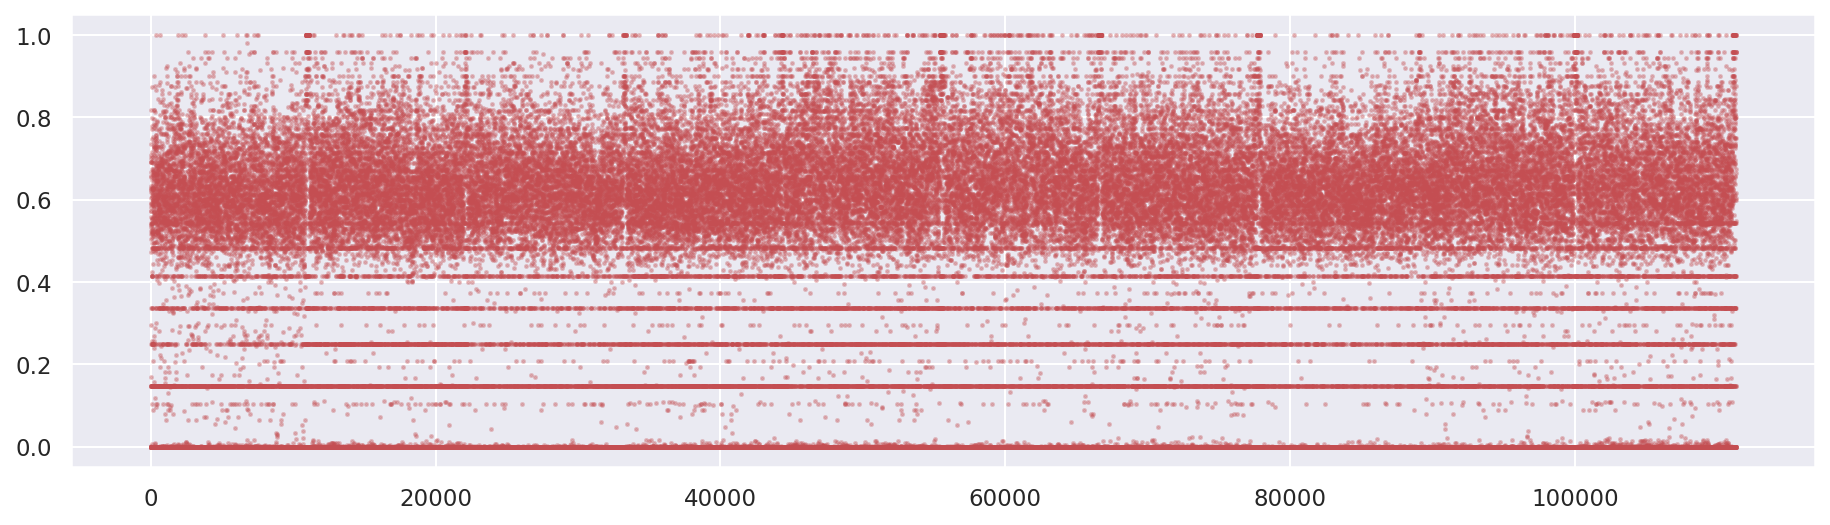

In [94]:
plt.figure(dpi=150, figsize=(15,4))
fdi_count = result[ result['FDI']==1 ]['mic'].count()
x_arr = np.arange(0, fdi_count)
plt.scatter(x_arr, result[ result['FDI']==1 ]['mic'], s=2, c='r', alpha=0.3)

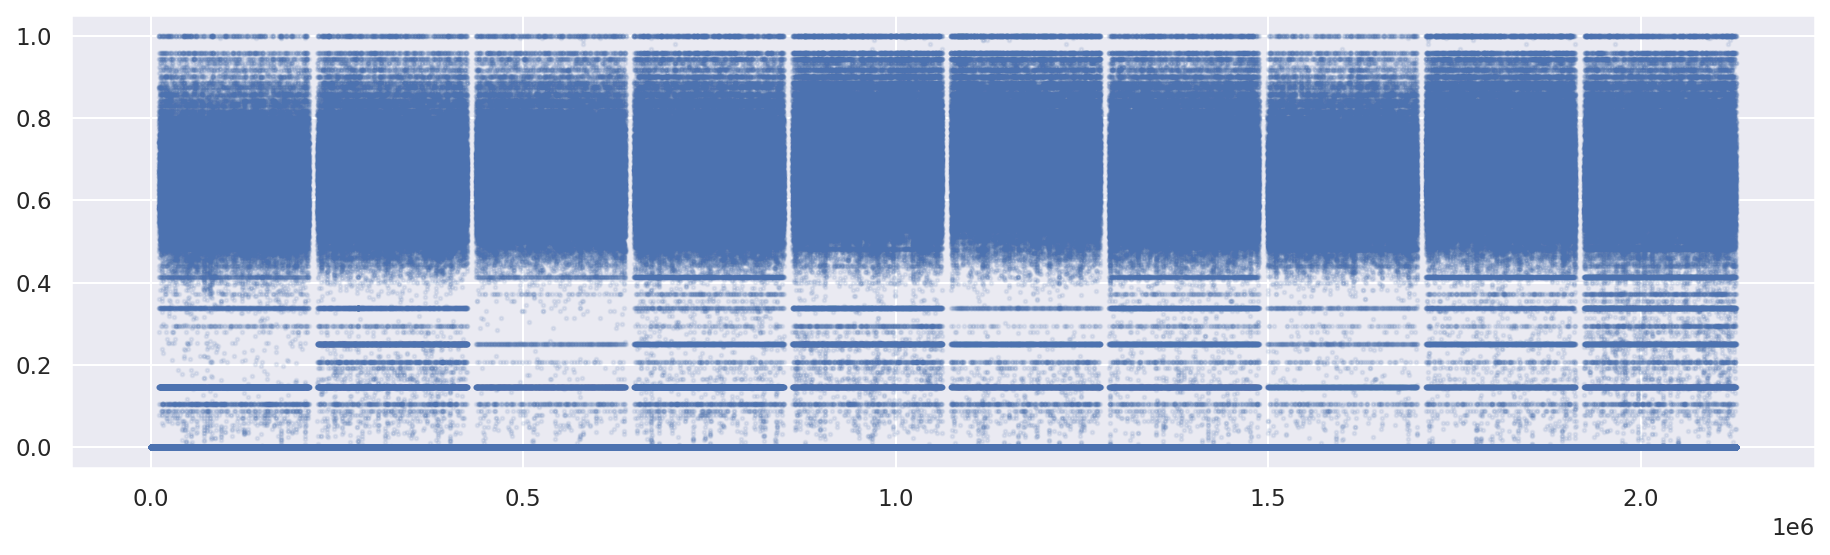

In [93]:
plt.figure(dpi=150, figsize=(15,4))
plt.scatter(np.arange(0, result['mic'].shape[0]-fdi_count), result[ result['FDI']==0 ]['mic'], s=3, c='b', alpha=0.1)

In [105]:
result[ result['FDI']==1 ]['mic'].count(), result[ result['FDI']==0 ]['mic'].count(), result.shape[0]

(111300, 2127950, 2239250)

In [107]:
result[ result['FDI']==1 ]['mic'].head(12), result[ result['FDI']==1 ]['mic'].tail(12)

(0     0.624128
 2     0.000000
 3     0.146094
 5     0.000000
 6     0.625000
 7     0.533201
 9     0.691398
 10    0.632795
 11    0.655639
 15    0.146094
 16    0.571517
 17    0.146094
 Name: mic, dtype: float64,
 2035181    0.000000
 2035184    0.665458
 2035186    0.750000
 2035187    0.000000
 2035188    0.000000
 2035189    0.958333
 2035192    0.599314
 2035193    1.000000
 2035195    0.604375
 2035196    1.000000
 2035198    0.958333
 2035199    0.146094
 Name: mic, dtype: float64)

In [106]:
result[ result['FDI']==0 ]['mic'].head(12), result[ result['FDI']==0 ]['mic'].tail(12)

(1     0.0
 4     0.0
 8     0.0
 12    0.0
 13    0.0
 14    0.0
 20    0.0
 21    0.0
 27    0.0
 28    0.0
 32    0.0
 34    0.0
 Name: mic, dtype: float64,
 2239238    0.000000
 2239239    1.000000
 2239240    0.000000
 2239241    0.000000
 2239242    0.590056
 2239243    0.760213
 2239244    0.000000
 2239245    0.958333
 2239246    0.885213
 2239247    0.000000
 2239248    0.568963
 2239249    0.146094
 Name: mic, dtype: float64)

In [98]:
area1= result.iloc[:422*530*2]

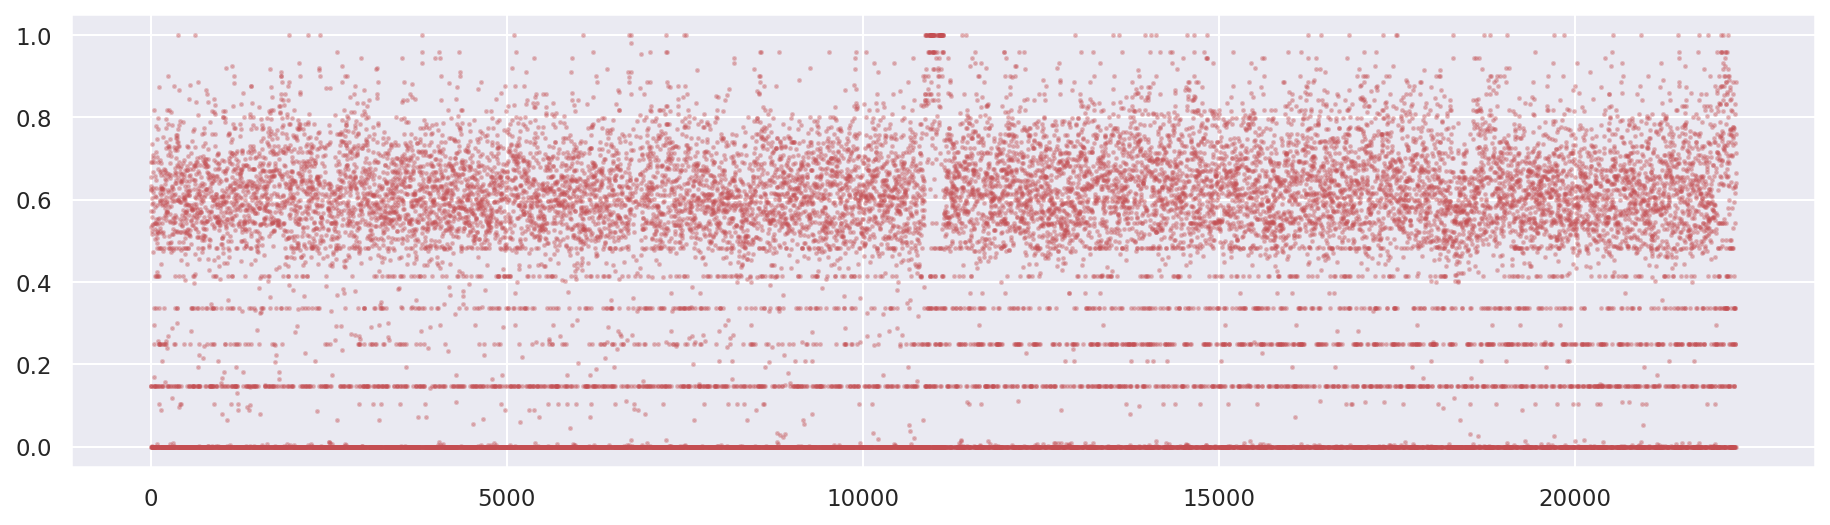

In [99]:
plt.figure(dpi=150, figsize=(15,4))
fdi_count = area1[ area1['FDI']==1 ]['mic'].count()
x_arr = np.arange(0, fdi_count)
plt.scatter(x_arr, area1[ area1['FDI']==1 ]['mic'], s=2, c='r', alpha=0.3)

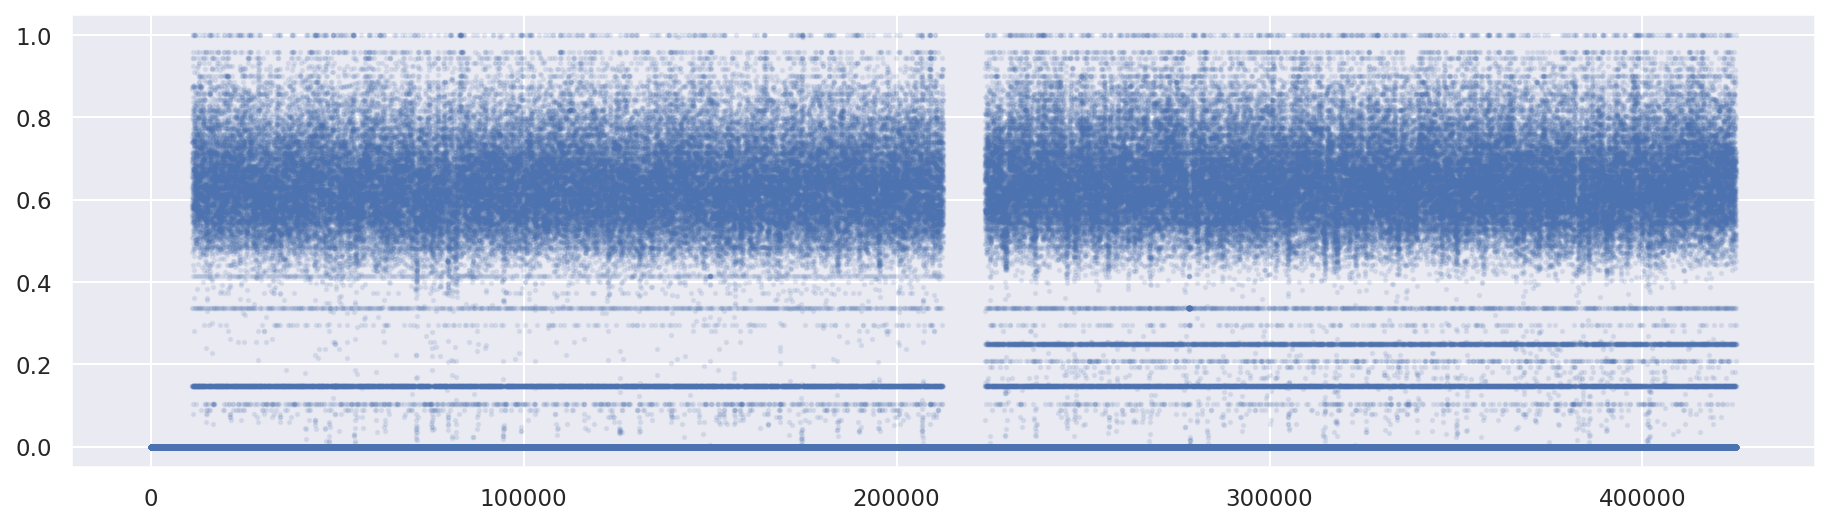

In [100]:
plt.figure(dpi=150, figsize=(15,4))
plt.scatter(np.arange(0, area1['mic'].shape[0]-fdi_count), area1[ area1['FDI']==0 ]['mic'], s=3, c='b', alpha=0.1)

In [8]:
dwt_distance.head(2)

MeterID         Day   FDI  meter_dtw  meter_sdtw
0     1236  2009-07-15  True   2.283294  -68.276715
1     1236  2009-07-16  True   1.178458  -73.734104

55650


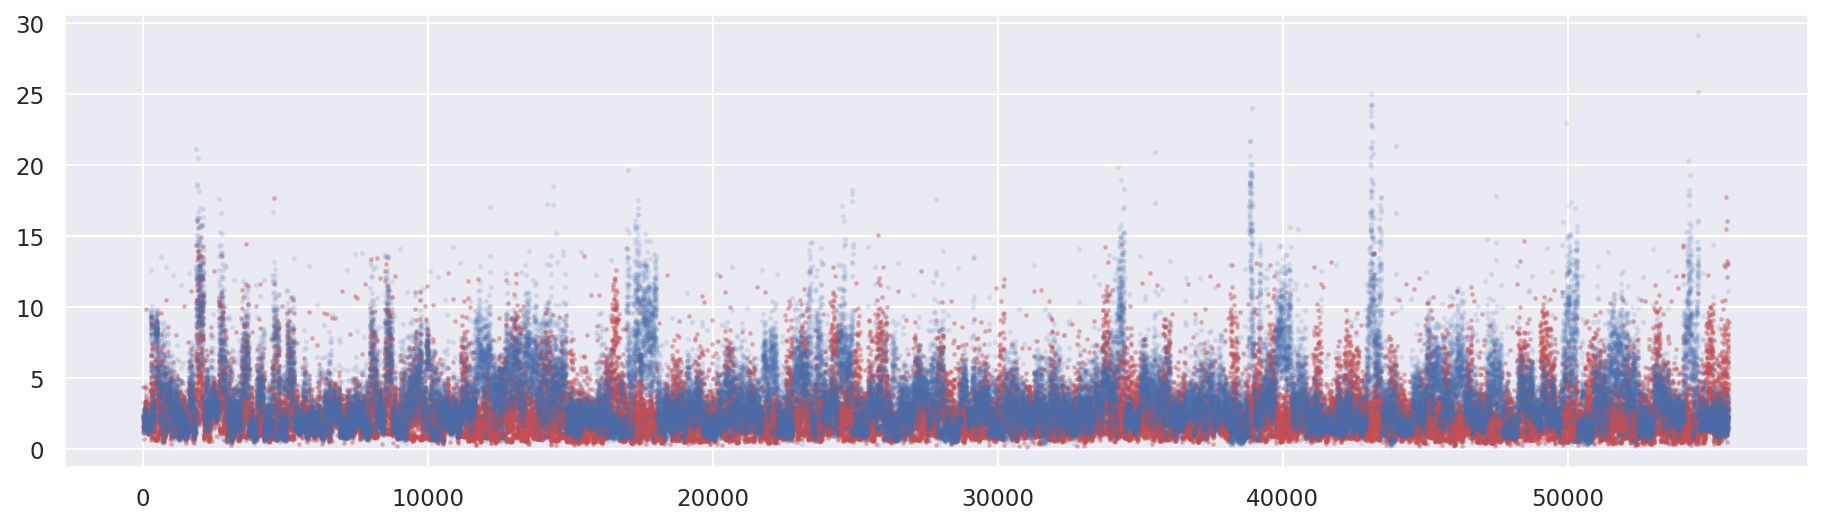

In [108]:
plt.figure(dpi=150, figsize=(15,4))
rng = int(dwt_distance[ result['FDI']==True ]['meter_dtw'].count()*0.5)
print(rng)
x = np.arange(0,rng)
plt.scatter(x, dwt_distance[ result['FDI']==True ]['meter_dtw'].to_numpy()[:rng], s=2, c='r', alpha=0.3)
plt.scatter(x, dwt_distance[ result['FDI']==False ]['meter_dtw'].to_numpy()[:rng], s=3, c='b', alpha=0.1)

In [16]:
v_value.head(2)

MeterID         Day   FDI  Tmax1  Tmax2  Tmin1     Cmax1     Cmax2  \
0     5212  2010-12-31  True     12     30     15  0.046464  0.047532   
1     5212  2010-12-31  True     27     38     36  0.217125  0.231040   

      Cmin1  
0  0.013561  
1  0.021254

111300


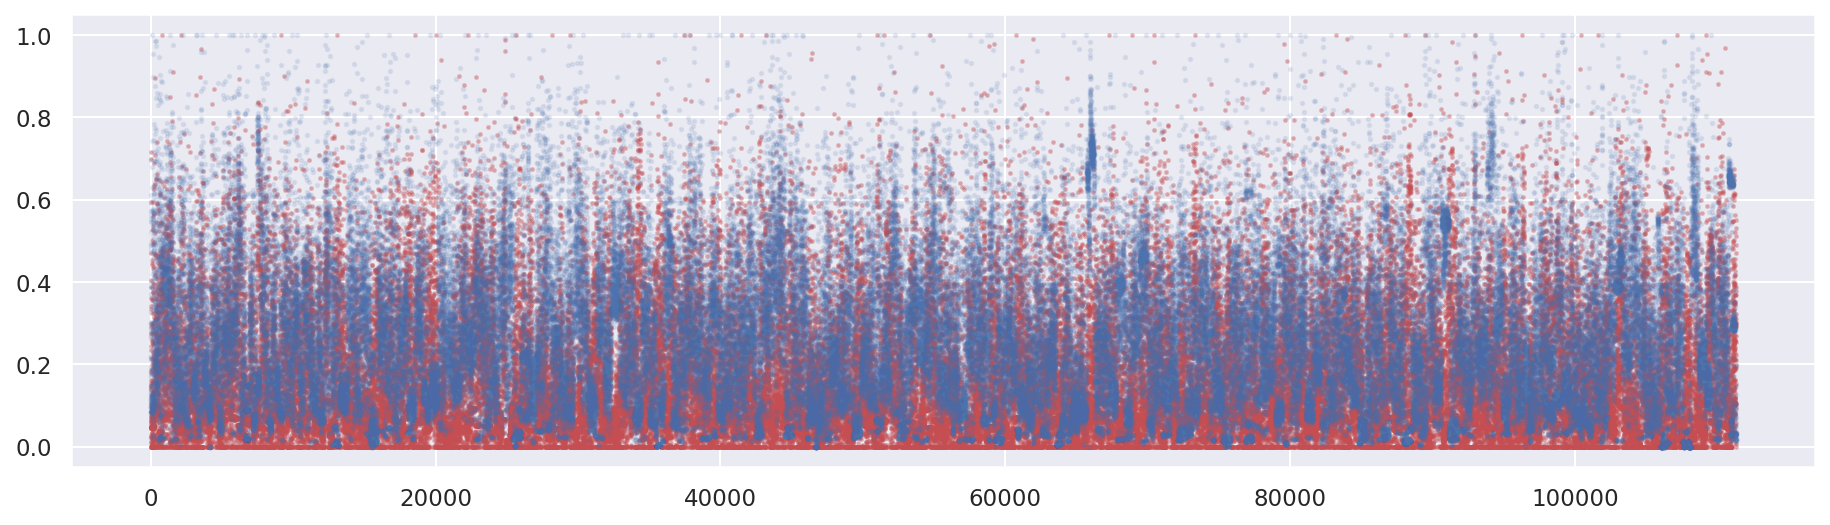

In [113]:
plot_feature(result, "Cmax1")

111300


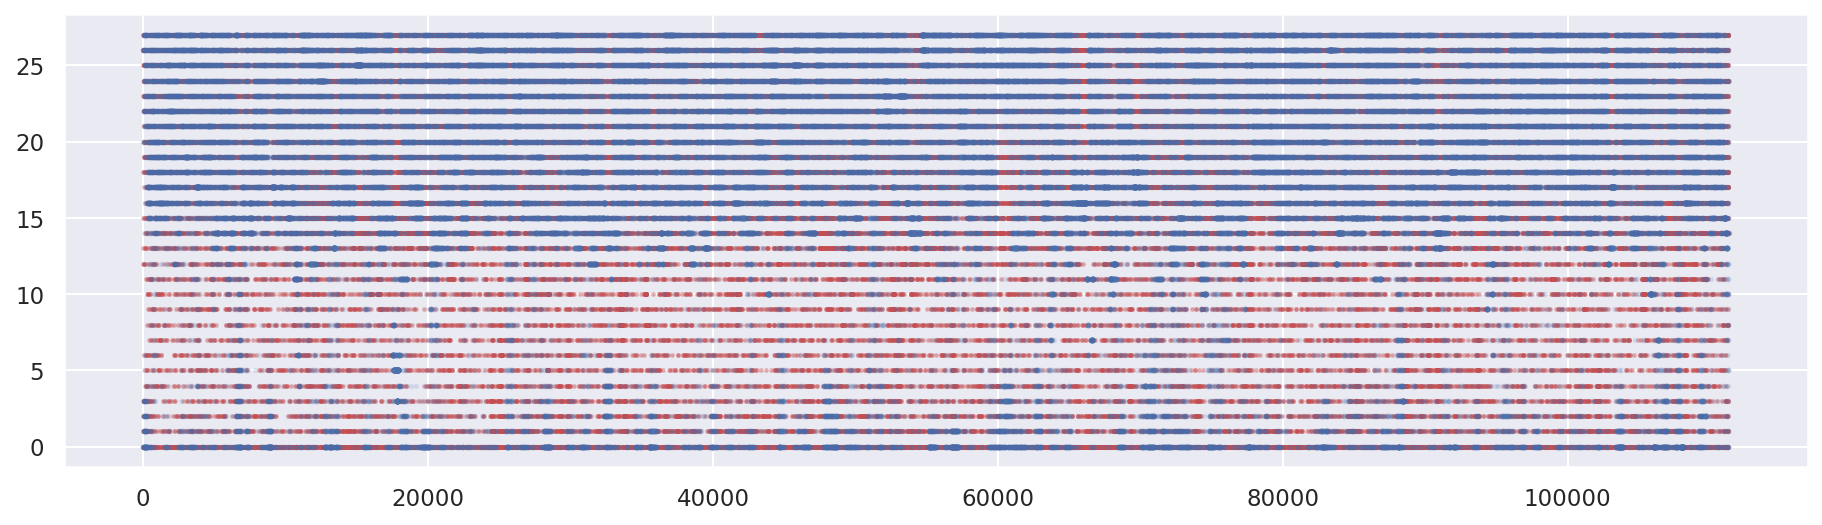

In [111]:
plot_feature(result, "Tmax1")

In [23]:
barycenter = pd.read_csv("CSV/one_cluster_sdtw_barycenter_48.csv")

In [24]:
bary = barycenter.to_numpy()

In [29]:
bary = bary.reshape(10, 530, 48)

In [30]:
bary.shape

(10, 530, 48)

In [31]:
df = pd.DataFrame(bary[0])

In [32]:
df.shape

(530, 48)

In [33]:
df.head(2)

0         1         2         3         4         5         6   \
0  0.368121  0.316786  0.269515  0.238066  0.228279  0.223257  0.206685   
1  0.364813  0.308477  0.268871  0.225733  0.211991  0.198366  0.190062   

         7         8         9   ...        38        39        40        41  \
0  0.200190  0.209082  0.216587  ...  0.703490  0.662777  0.648620  0.651027   
1  0.189101  0.191156  0.199107  ...  0.557583  0.541320  0.506673  0.516545   

         42        43        44        45        46        47  
0  0.674121  0.658791  0.673030  0.652800  0.591557  0.466256  
1  0.510110  0.500704  0.563481  0.557293  0.514611  0.428142  

[2 rows x 48 columns]

In [34]:
df[df[0]>3]

0         1         2         3         4         5         6   \
524  4.545769  4.054513  3.724724  3.478933  3.301683  3.127073  2.997118   

           7         8         9   ...        38        39        40  \
524  2.949326  2.850445  2.792344  ...  1.402959  1.271388  1.236878   

           41        42        43        44        45        46        47  
524  1.227104  1.208187  1.191338  1.190907  1.186428  3.166631  3.098122  

[1 rows x 48 columns]